<a href="https://colab.research.google.com/github/lochana-vishwajith/ML_Assignment2_IT19140230_IT19111520_IT18014396_IT19152806/blob/main/ML_Assingment2_CarPrice_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

description about the libraries


**NumPy**

NumPy, which stands for Numerical Python, is a python library that consists of multidimensional array objects and a collection of routines for processing those arrays. Using NumPy, logical and mathematical operations can be performed.

**sklearn**

Sklearn, which stands for scikit-learn is a python library for machine learning. Sklearn is focuses on machine learning techniques, such as mathematical, statistical, and general-purpose algorithms, which serve as the foundation for many machine learning technologies. The sklearn library includes a number of useful machine learning and statistical modeling methods, such as classification, regression, clustering, and dimensionality reduction.


In [ ]:
#Importing libraries 
import pandas as pd
import numpy  as np
from sklearn import linear_model
import sys
np.set_printoptions(threshold=sys.maxsize)
import seaborn as sns #data visualization

importing the code

In [ ]:
url = 'https://raw.githubusercontent.com/lochana-vishwajith/ML_Assignment2_IT19140230_IT19111520_IT18014396_IT19152806/main/Vehicle%20details.csv'
carset = pd.read_csv(url)

checking the dataset

In [ ]:
#Viewing the dataset
carset.head() 

,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage
0,"12,900,000",Honda,Vezel,Limited,2017,Used,Automatic,SUV / 4x4,Hybrid,"1,500 cc","37,000 km"
1,"16,250,000",Jaguar,XF,Fully Loaded,2013,Used,Automatic,Saloon,Diesel,"2,200 cc","42,000 km"
2,"17,000,000",Toyota,CHR,GT New Face 2wd,2020,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","15,000 km"
3,"13,000,000",Toyota,CHR,Toyato,2017,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","21,000 km"
4,"33,500,000",Toyota,Land Cruiser Prado,prado,2015,Used,Automatic,SUV / 4x4,Petrol,"2,700 cc","57,000 km"


In [ ]:
carset.shape #Deriving the shape

(40531, 11)

In [ ]:
carset.info() #Information on dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40531 entries, 0 to 40530
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Price         40531 non-null  object
 1   Brand         40531 non-null  object
 2   Model         40531 non-null  object
 3   Edition       40531 non-null  object
 4   Year          40531 non-null  int64 
 5   Condition     40531 non-null  object
 6   Transmission  40531 non-null  object
 7   Body          40531 non-null  object
 8   Fuel          40531 non-null  object
 9   Capacity      40531 non-null  object
 10  Mileage       40531 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.4+ MB


Featuring the dataset 

In [ ]:
#finding the unique values available in the year
carset['Year'].unique()
#year column is ok 

array([2017, 2013, 2020, 2015, 2018, 2016, 1995, 2007, 2012, 2010, 1985,
       2008, 2019, 2003, 2014, 1999, 2011, 1982, 1989, 2006, 2009, 2005,
       1993, 1990, 1988, 2004, 1981, 1983, 1979, 2002, 1991, 2000, 1996,
       2001, 1997, 1984, 2021, 1998, 1978, 1987, 1986, 1992, 1994, 1960,
       1975, 1958, 1980, 1976, 1956, 1959, 1953, 1967, 1973, 1972, 1955,
       1946, 1968, 1961, 1969, 1970, 1974, 1966, 1977, 1971, 1947, 1963,
       1964, 1945, 1952, 1965, 1957, 1935, 1938, 1950, 1962, 1922, 2022,
       1951])

In [ ]:
# finding the unique values in price
len(carset['Price'].unique())

2516

In [ ]:
len(carset['Edition'].unique())

14106

some of the data has been supressed we cannot have a look on them so need to enable options to see them as well.

In [ ]:
from os import truncate
#display.show_dimensions set
pd.set_option('display.show_dimensions',True)

In [ ]:
#display.show_dimensions
pd.get_option('display.show_dimensions')

True

checking out the options selected correctly or not

In [ ]:
carset['Edition'].unique()

In [ ]:
len(carset['Brand'].unique())

60

In [ ]:
type(carset['Edition'].unique())

numpy.ndarray

In [ ]:
print(carset['Edition'].unique())

In [ ]:

print(len(carset['Edition'].unique()))

14106


In [ ]:
carset['Brand'].unique()

In [ ]:
carset['Model'].unique()

In [ ]:
carset['Year'].unique()

In [ ]:
carset['Year'].unique()

In [ ]:
carset['Condition'].unique()

array(['Used', 'Reconditioned', 'New'], dtype=object)

In [ ]:
carset['Transmission'].unique()

array(['Automatic', 'Manual', 'Tiptronic', 'Other transmission'],
      dtype=object)

In [ ]:
carset['Body'].unique()

array(['SUV / 4x4', 'Saloon', 'Hatchback', 'MPV', 'Convertible',
       'CoupÃ©/Sports', 'Station wagon'], dtype=object)

In [ ]:
carset['Fuel'].unique()

array(['Hybrid', 'Diesel', 'Petrol', 'CNG', 'Electric', 'Other fuel type'],
      dtype=object)

In [ ]:
carset['Capacity'].unique()

In [ ]:
carset['Mileage'].unique()


In [ ]:
carset['Price'].unique()

In [ ]:
carset['Edition'].unique()

Feature Set Findings



1.   *model column ok*

2.  *the brand column ok*

3. year ok
4.condition ok
5.transmission ok (remove other type)
6.body ok 
7.fuel other types remove
8.capacity need to (convert into int values, remove cc ,change into same fromat)
9. price change into int format
10. milage change into int format

11. edition need to change 









In [ ]:
#creating a backup copy of our dataset
backupcarset = carset.copy()

Cleaning the data of price column

In [ ]:

#checking numeric values from the price column
print(len(carset['Price'].str.isnumeric()))




40531


In [ ]:
#checking numeric values from the mileage column
print(len(carset['Mileage'].str.isnumeric()))

40531


In [ ]:
# removing commas from the price tags and set it into the integer type
carset['Price'] = carset['Price'].str.replace(',','').astype(int);

In [ ]:
#checking the infor object to check weather dataset is changed or not
carset.info()

featuring the milage to integer type


In [ ]:
carset['Mileage'].unique()

In [ ]:
carset['Mileage'] =carset['Mileage'].str.split(" ").str.get(0).str.replace(",",'').astype(int)

In [ ]:
carset.info()

brand-edition start

In [ ]:
print( np.array(pd.unique(carset[['Brand','Edition']].values.ravel('K'))).ndim)

df = pd.DataFrame({'Brand' : carset['Brand'],
                   'Edition' : carset['Edition']})
carset.pop('Edition')
carset.info()

brand edition -end

capacity

In [ ]:
carset['Capacity'] = carset['Capacity'].str.split(" ").str.get(0).str.replace(",",'').astype(int)

capacity end

In [ ]:
carset.info()

featuring the minor changes of fuel and transmission

In [ ]:
carset['Transmission'].unique()

array(['Automatic', 'Manual', 'Tiptronic', 'Other transmission'],
      dtype=object)

In [ ]:
#removing other transmissions
carset = carset[carset['Transmission'] != 'Other transmission'] 

In [ ]:
#check uniques for transmissions
carset['Transmission'].unique()

array(['Automatic', 'Manual', 'Tiptronic'], dtype=object)

In [ ]:
#featuring fuel types
carset['Fuel'].unique()

array(['Hybrid', 'Diesel', 'Petrol', 'CNG', 'Electric', 'Other fuel type'],
      dtype=object)

In [ ]:
#removing other fuel type
carset = carset[carset['Fuel'] != 'Other fuel type'] 

In [ ]:
#check unique for fuel type
carset['Fuel'].unique()

array(['Hybrid', 'Diesel', 'Petrol', 'CNG', 'Electric'], dtype=object)

In [ ]:
#summery of feature set
print(carset.describe())

              Price          Year      Capacity         Mileage
count  4.006700e+04  40067.000000  40067.000000    40067.000000
mean   9.981771e+06   2009.755559   1552.358450    91833.186088
std    1.181099e+07     10.126559    710.523134    73321.145265
min    2.100000e+05   1971.000000     70.000000        0.000000
25%    3.575000e+06   2007.000000   1000.000000    41900.000000
50%    6.300000e+06   2014.000000   1500.000000    79000.000000
75%    1.165000e+07   2017.000000   1800.000000   125000.000000
max    2.100000e+08   2022.000000   4999.000000  1000000.000000

[8 rows x 4 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


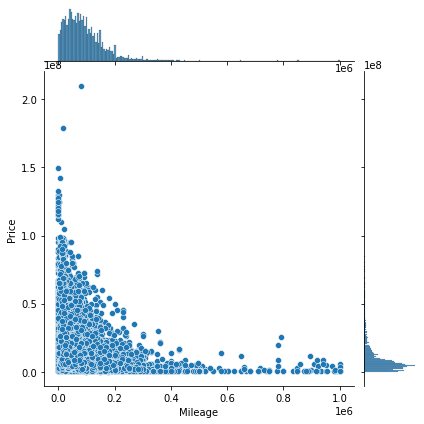

In [ ]:
#Viariation of price according to different features
sns.jointplot(carset['Mileage'], carset['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


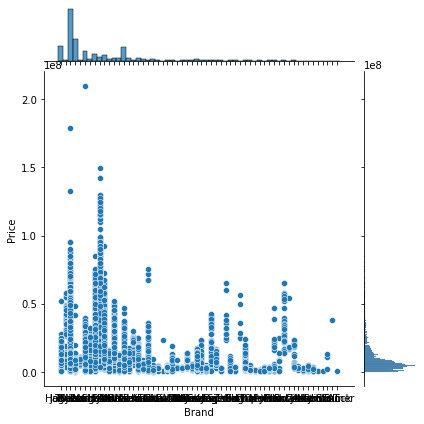

In [ ]:
sns.jointplot(carset['Brand'], carset['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


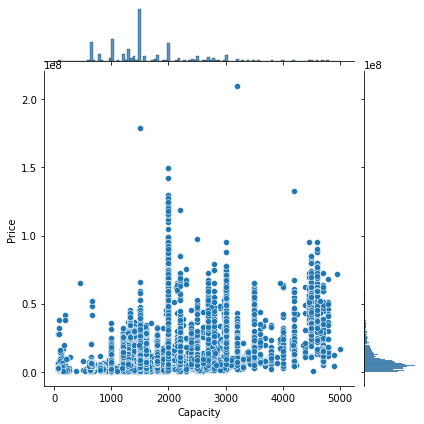

In [ ]:
sns.jointplot(carset['Capacity'], carset['Price'])

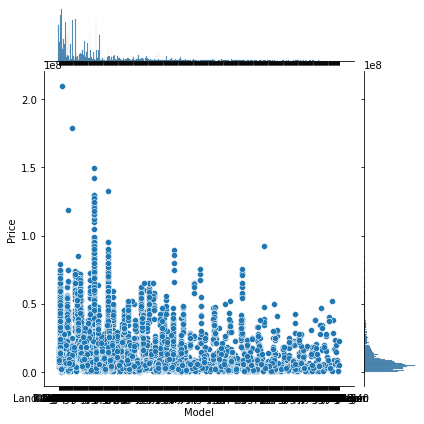

In [ ]:
sns.jointplot(carset['Model'], carset['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


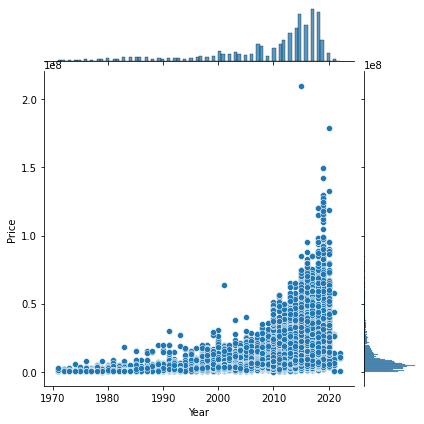

In [ ]:
sns.jointplot(carset['Year'], carset['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


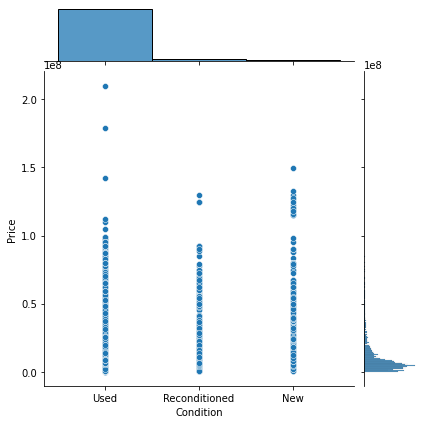

In [ ]:
sns.jointplot(carset['Condition'], carset['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


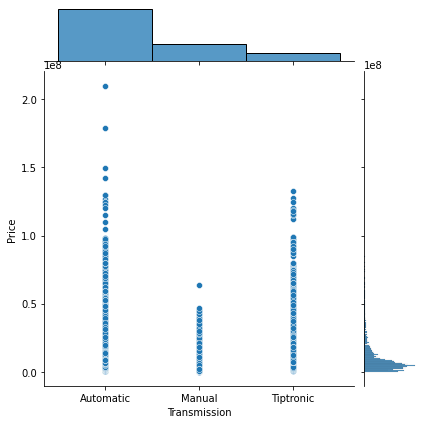

In [ ]:
sns.jointplot(carset['Transmission'], carset['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


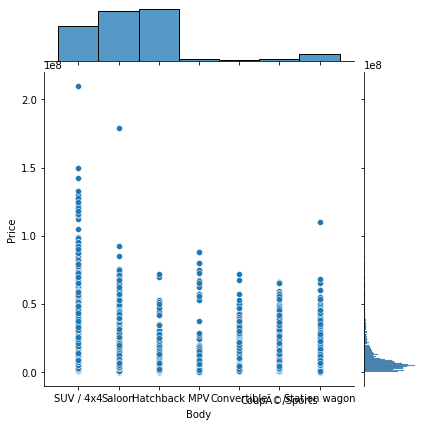

In [ ]:
sns.jointplot(carset['Body'], carset['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


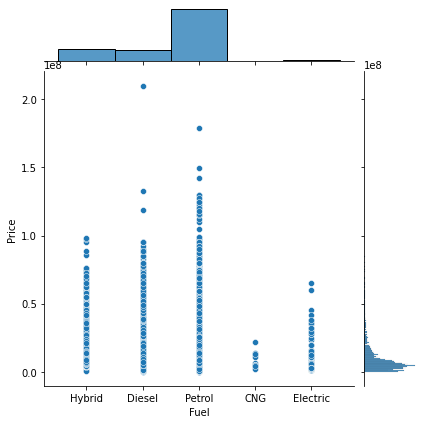

In [ ]:
sns.jointplot(carset['Fuel'], carset['Price'])

removing the 

In [ ]:
# removing the other brand from dataset
carset = carset[carset['Brand'] != 'Other brand']


In [ ]:
#Removing other models from the Model column
carset =carset[carset['Model'] != 'Other model']

In [ ]:
#Removing less than 200000 priced vehicles from the dataset
carset  = carset[carset['Price'] > 200000]

In [ ]:
carset

In [ ]:
#checking info of dataset
carset.info()

In [ ]:
#removing vehicles which are older than 1980 since less the outlier values and less down the dispersion of the data
carset = carset[carset['Year'] > 1970]

In [ ]:
#capacity removing capacities less than 70 since the capacity of a electric vehicle is 70 or 80
carset = carset[carset['Capacity'] > 69]

In [ ]:
#removing vehicles which are capacity graeter than 5000
carset = carset[carset['Capacity']  < 5000]

In [ ]:
print(carset.describe())

              Price          Year      Capacity         Mileage
count  4.006700e+04  40067.000000  40067.000000    40067.000000
mean   9.981771e+06   2009.755559   1552.358450    91833.186088
std    1.181099e+07     10.126559    710.523134    73321.145265
min    2.100000e+05   1971.000000     70.000000        0.000000
25%    3.575000e+06   2007.000000   1000.000000    41900.000000
50%    6.300000e+06   2014.000000   1500.000000    79000.000000
75%    1.165000e+07   2017.000000   1800.000000   125000.000000
max    2.100000e+08   2022.000000   4999.000000  1000000.000000

[8 rows x 4 columns]


In [ ]:
#carset.to_csv("car_feature_end.csv")

finished featuring

Implementation of the Model

In [ ]:
X = carset.drop(columns='Price')
y = carset['Price']

In [ ]:
y

In [ ]:
X

test size is set as 0.2 or 20% from the total dataset

In [ ]:
# sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [ ]:
ohe = OneHotEncoder()
ohe.fit(X[['Brand', 'Model', 'Year', 'Condition' ,'Transmission', 'Body', 'Fuel', 'Capacity', 'Mileage']])

OneHotEncoder()

In [ ]:
ohe.categories_

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Brand', 'Model', 'Year', 'Condition' ,'Transmission', 'Body', 'Fuel', 'Capacity', 'Mileage']))

In [ ]:
lr = LinearRegression()

In [ ]:
pipe = make_pipeline(column_trans,lr)

In [ ]:
pipe.fit(X_train,y_train)

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
y_pred

In [ ]:
r2_score(y_test,y_pred)

0.8675879713651061

In [ ]:
for i in range(10):
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
  lr = LinearRegression()
  pipe = make_pipeline(column_trans,lr)
  pipe.fit(X_train,y_train)
  y_pred = pipe.predict(X_test)
  print(r2_score(y_test,y_pred), i)

In [ ]:
scores = []
for i in range(10):
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i)
  lr = LinearRegression()
  pipe = make_pipeline(column_trans,lr)
  pipe.fit(X_train,y_train)
  y_pred = pipe.predict(X_test)
  scores.append(r2_score(y_test,y_pred))

In [ ]:
np.argmax(scores)

5

In [ ]:
scores[np.argmax(scores)]

0.8825555326999381

In [ ]:
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=np.argmax(scores))
  lr = LinearRegression()
  pipe = make_pipeline(column_trans,lr)
  pipe.fit(X_train,y_train)
  y_pred = pipe.predict(X_test)


In [ ]:
import pickle

In [ ]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [ ]:
pipe.predict(pd.DataFrame([['Toyota','Yaris', 2007, 'Used' ,'Automatic', 'Saloon', 'Petrol', 1300, 90000]],columns=['Brand', 'Model', 'Year', 'Condition' ,'Transmission', 'Body', 'Fuel', 'Capacity', 'Mileage']))

array([3797324.44067756])

In [ ]:
pipe.predict(pd.DataFrame([['Ford','Laser', 2000, 'Used' ,'Manual', 'Saloon', 'Petrol', 1500, 190000]],columns=['Brand', 'Model', 'Year', 'Condition' ,'Transmission', 'Body', 'Fuel', 'Capacity', 'Mileage']))

array([2328340.30021752])

In [ ]:
pipe.predict(pd.DataFrame([['Mitsubishi','Montero', 2012, 'Used' ,'Tiptronic', 'SUV / 4x4', 'Diesel', 2600, 90000]],columns=['Brand', 'Model', 'Year', 'Condition' ,'Transmission', 'Body', 'Fuel', 'Capacity', 'Mileage']))

array([15234036.51806885])

Finished